In this code we will build an X-Bar Chart and R Chart to monitor process variations for a company manufacturing electrical components.

Rebecca manages a process to manufactures wires that need with be within a certain measurement in millimeters.
Rebecca takes 5 wire measurements daily for one month to monitor the process.

Additional Reference: <https://r-bar.net/xmr-control-chart-tutorial-examples/>

We will begin by loading packages.

In [3]:
library(ggQC) 
library(ggplot2)
library(stats)

Warning message:
"package 'ggQC' was built under R version 4.3.3"


Warning message:
"package 'ggplot2' was built under R version 4.3.3"


Load the daily wire measurement data.
The data contains 5 measurements (observed values) for 31 days.

In [4]:
data = read.csv("Module_13_Example_Data.csv")
head(data)

,Day_Of_Month,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,8.07,9.12,9.94,10.62,9.10
2,2,8.43,10.75,10.87,10.89,9.38
3,3,9.14,10.08,8.90,8.50,10.72
4,4,8.50,10.23,9.29,9.05,11.00
5,5,8.33,8.65,10.35,8.33,8.24
6,6,10.15,9.92,9.15,8.42,9.48


Determine the mean observation value (X-bar) for each sample.

In [6]:
# Add a column for the mean measurement value (X_bar) for each sample. 
# The data[,-1] means to not include the first column (the day of the month) in the mean calculation.

data$X_bar = rowMeans(data[,-1])
head(data)

,Day_Of_Month,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5,X_bar
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,8.07,9.12,9.94,10.62,9.10,9.370
2,2,8.43,10.75,10.87,10.89,9.38,10.064
3,3,9.14,10.08,8.90,8.50,10.72,9.468
4,4,8.50,10.23,9.29,9.05,11.00,9.614
5,5,8.33,8.65,10.35,8.33,8.24,8.780
6,6,10.15,9.92,9.15,8.42,9.48,9.424


Determine the range of observation values (R) for each sample.

In [9]:
data$R = apply(data[,6:2],1,max)-apply(data[,2:6],1,min)
head(data)

,Day_Of_Month,Measurement_1,Measurement_2,Measurement_3,Measurement_4,Measurement_5,X_bar,R
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,8.07,9.12,9.94,10.62,9.10,9.370,2.55
2,2,8.43,10.75,10.87,10.89,9.38,10.064,2.46
3,3,9.14,10.08,8.90,8.50,10.72,9.468,2.22
4,4,8.50,10.23,9.29,9.05,11.00,9.614,2.50
5,5,8.33,8.65,10.35,8.33,8.24,8.780,2.11
6,6,10.15,9.92,9.15,8.42,9.48,9.424,1.73


Determine the mean range (R-bar), the mean of all observations for all samples (X-double-bar), and the standard deviation.

In [11]:
# Calculate X-double-bar and R-bar.

X_dbl_bar= mean(data$X_bar)
R_bar = mean(data$R)


# STD Dev

Stdv = sd(as.matrix(data[,2:6]))
X_dbl_bar
R_bar
Stdv



[1] 9.647613

[1] 2.37

[1] 0.9533257

Calculate the upper control limits and lower control limits for the X-bar and R charts.

UCLx = X-double-bar + (A_2 \* R-bar)

LCLx = X-double-bar - (A_2 \* R-bar)

UCLr = D_4 \* R-bar

LCLr = D_3 \* R-bar

A_2, D_4 and D_3 are constant values we must look up in a reference table and are dependent on the number of observations taken per sample.
(They are not calculated from our data.) We have 5 observations for each sample.
Thus, for n=5 observations, our constants are: A_2 = 0.5768 D_4 = 2.1145 D_3 = 0

To look up additional control chart constants for different numbers of observations, visit: <https://r-bar.net/control-chart-constants-tables-explanations/#XbarR_Sec>

In [14]:
# Look up control chart constants for n=5 observations.
d3 = 0
d4 = 2.1145
a2 = 0.5768

# Calculate the upper control limit and lower control limit for the X-bar chart. # Calculate the Center of the two limits.
UCLx = X_dbl_bar + (a2*R_bar)
LCLx = X_dbl_bar - (a2*R_bar)

# Calculate the upper control limit and lower control limit for the R chart. Calculate the Center of the two limits.
UCLr= d4*R_bar
LCLr= d3*R_bar

UCLx
LCLx
UCLr
LCLr

[1] 11.01463

[1] 8.280597

[1] 5.011365

[1] 0

Plot the R chart.
This chart monitors the spread.

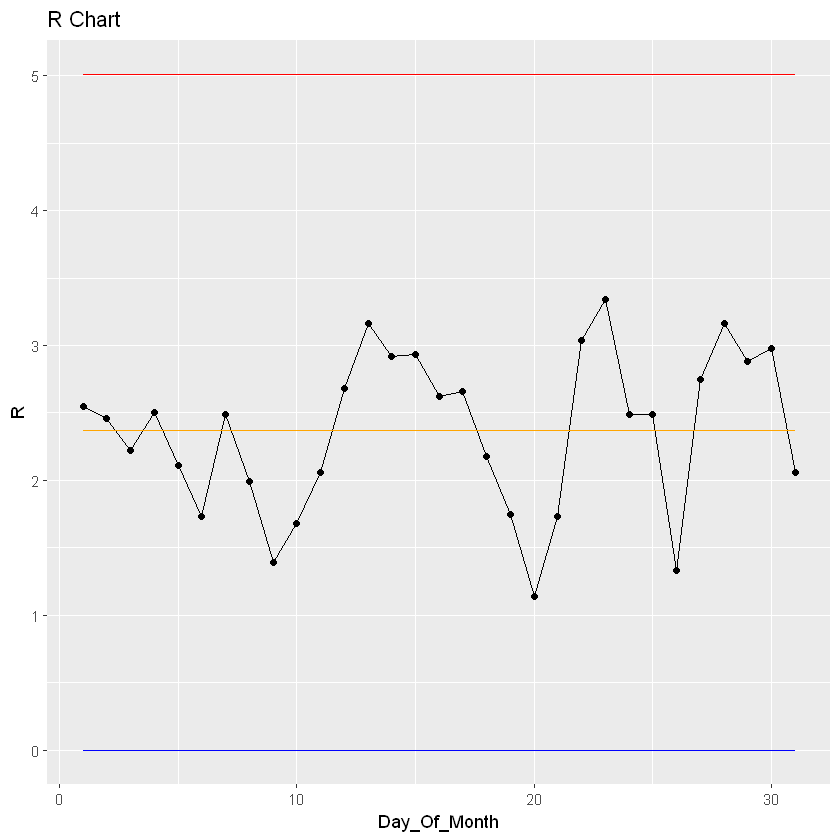

In [15]:
# Create a ggplot using our data, use the "Sample" column for the x-axis and the "R" column for the y axis.
# Add points and a line to the chart to show the R value for each sample, and add the Center, UCLr, and LCLr lines.
ggplot(data, aes(x=Day_Of_Month, y=R)) + 
geom_point() + geom_line() + 
geom_line(aes(y=LCLr), color="blue") + 
geom_line(aes(y=UCLr), color="red") + 
geom_line(aes(y=R_bar), color="orange")+ 
ggtitle("R Chart")

Plot the X-bar chart.
This chart monitors the mean.


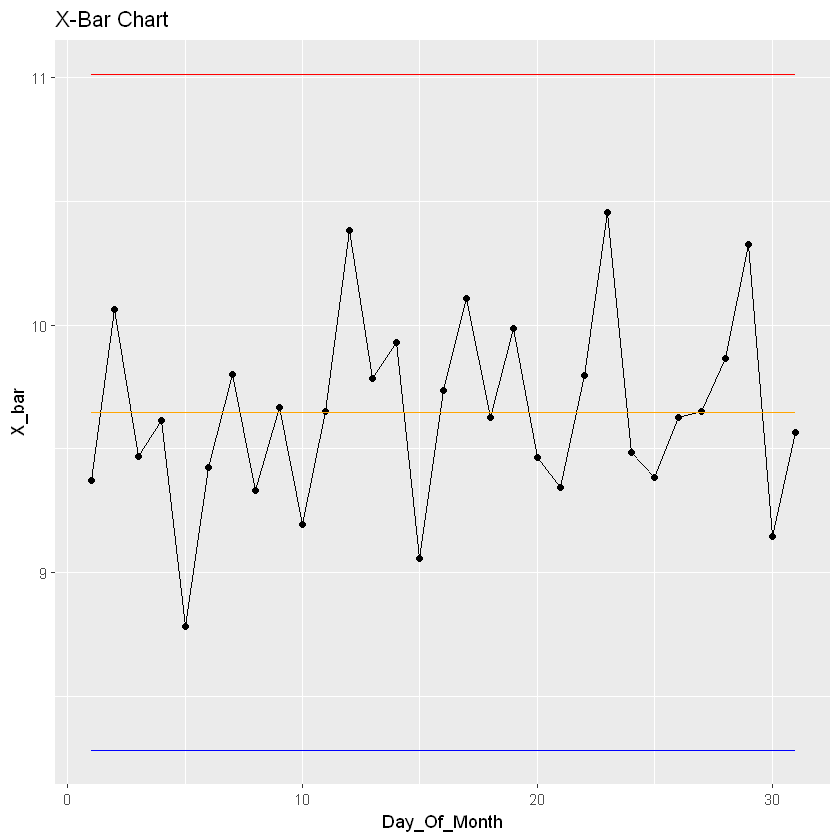

In [16]:
# Create a ggplot using our data, use the "Sample" column for the x-axis and the "X_bar" column for the y axis.
# Add points and a line to the chart to show the X_bar value for each sample, and add the UCLx, LCLx, and Center lines.
ggplot(data, aes(x=Day_Of_Month, y=X_bar)) + 
geom_point() + geom_line() + geom_line(aes(y= LCLx), color="blue") + 
geom_line(aes(y=UCLx), color="red") + 
geom_line(aes(y= X_dbl_bar), color="orange") +
ggtitle("X-Bar Chart")


Calculate Cp = (Upper specification – Lower Specification)/6𝝈 • Cp \>=1.0 indicates process is capable • Six Sigma equates to a Cp \>=2.0 • This value only looks at spread, not how well a process is centered on its target value.

Our upper specification is given as 13, and our lower specification is given as 7.

In [19]:
upper_spec = 13
lower_spec = 7
cp = (upper_spec - lower_spec)/(6*Stdv)
cp

[1] 1.048959

Next, we'll calculate Cpk: Cpk = Minimum of [{(upper specification - x-double-bar)/3𝝈)} , {(x-double-bar - lower specification)/3𝝈)}] • Gives the proportion of variation between the center of the process and the nearest specification limit • Cpk = 1 means process meets specifications • Cpk \< 1 Process does NOT meet specifications • Cpk \> 1 Process is better than the specification requires


In [21]:
cpk = min( (upper_spec- X_dbl_bar)/(3*Stdv),(X_dbl_bar-lower_spec)/(3*Stdv))
cpk

[1] 0.9257461